# Assignment 03b - Analysis

Name:  Christopher Truong
Class: INST 447 0101 
Favorite Animal: Dog or Swordfish

## Introduction

You've not only cleaned the data; you produced the data. This means that you have a pretty good understanding of what this dataset contains without me telling you its provenance.

Reveal the truths or weaknesses of this dataset to me.

You got this!

### Install vaderSentiment

To run my code,  you will need to install vaderSentiment.

1. Open a command prompt (easiest way is through Anaconda Navigator and to click the arrow for your Environment in the Environments Tab).
2. Type `pip install vadersentiment`
3. If that worked, then you should be able to import it below using: `from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer`

### Import Statements
Don't forget your imports. You probably need more than this? Maybe Pandas, Numpy, some kind of visualiation library?

In [1]:
# Import your libraries here 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


### Create your Pandas DataFrame
Read in the file and make a DataFrame with Pandas.

In [2]:
# Create a DataFrame
df = pd.read_csv('AmazonReviewsAggregated-CleanedExample.csv')
df.head()


,amazon_identifier,product_name,product_price,review_date,review_title,number_of_stars,verified_purchase,review_body,number_found_helpful
0,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,Pain 100% does bring the heat. It is a ...,5,1.0,Pain 100% does bring the heat. It is a tangy s...,0.0
1,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,flavor-wise this one isn't the greatest but be...,3,1.0,flavor-wise this one isn't the greatest but be...,0.0
2,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Good!!,4,1.0,"Pretty good sauce, way too spicy for my taste ...",0.0
3,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Worst hot sauce I've ever tried,1,0.0,Originally purchased from Bucky's. Worst hot s...,0.0
4,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-27T00:00:00Z,but I love it! I add a few drops to a ...,5,1.0,"It is extremely hot, but I love it! I add a fe...",0.0


### Prepare Your DataFrame for Analysis
Are all the data types still correct after import? Just because you cleaned with the data in OpenRefine, it doesn't mean that it will import correctly. Maybe there was an issue? Maybe it got confused? 

# Do all the columns have the correct data types?
No.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xed in position 10: invalid continuation byte

I received this error. Therefore, not all of the data was in the correct type. In this case, there is a utf-8 codec failure. 

I solved this by saving it with the right encoding





### Describe Your DataFrame
What am we looking at? Do you future self a favor and describe the data. Is there missing data? How many columns? What are the columns types?

In [3]:

df.describe()

,product_price,number_of_stars,verified_purchase,number_found_helpful
count,3057.000000,3137.000000,3134.000000,3134.000000
mean,66.838034,3.950590,0.807913,5.273772
std,114.151665,1.598722,0.394004,67.365203
min,0.000000,0.000000,0.000000,0.000000
25%,11.740000,3.000000,1.000000,0.000000
50%,22.980000,5.000000,1.000000,0.000000
75%,69.990000,5.000000,1.000000,0.000000
max,1098.990000,5.000000,1.000000,1472.000000


In [4]:
df.isnull().values.any()

True

The data frame we are working with is the cleaned csv (through the use of OpenRefine) of the aggregated Amazon reviews. There are thousands of rows detailing amazon products. Each column has a different purpose, identifying the product, the name, price, review information (Date, title, stars, verified, body, helpfulness) that give numbers and text of information among these products. The data itself contains null values, and there are 7 columns. The columns contain data that are character, numbers, floats, strings, and alphanumeric identifiers.

### Run My Code: Sentiment Analysis

This function takes a row in as an argument. In order to run this code, you need to have this function iterate over the date frame.

This is using the Vader Sentiment analyzer (https://github.com/cjhutto/vaderSentiment) that you installed above. It is calculating the scored. The creators of the tool suggest these thresholds for interpretting the score:
* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

In [5]:
sentiment = []
for index, row in df.iterrows():
    review_body = row['review_body']
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review_body)
    print(index, scores['compound'])
    sentiment.append(scores['compound'])
print(sentiment)
    

0 0.335
1 -0.1862
2 0.7845
3 -0.505
4 0.9435
5 0.0
6 0.7345
7 0.0
8 -0.3612
9 0.5657
10 0.862
11 0.93
12 -0.4441
13 0.5994
14 -0.4471
15 0.5365
16 -0.8412
17 -0.3558
18 0.6308
19 0.0258
20 0.7579
21 0.4215
22 -0.5267
23 -0.9317
24 0.8715
25 0.9485
26 0.6956
27 -0.7365
28 0.9948
29 0.9273
30 0.1779
31 -0.6711
32 0.8802
33 -0.5848
34 0.7778
35 -0.34
36 0.6249
37 -0.296
38 0.7269
39 -0.1556
40 0.4215
41 -0.461
42 0.9108
43 0.8833
44 0.9807
45 0.9381
46 0.9885
47 -0.8126
48 0.089
49 0.4389
50 0.9128
51 0.9602
52 0.6901
53 0.6705
54 0.6124
55 -0.3374
56 -0.296
57 0.0
58 0.996
59 0.0
60 -0.8555
61 0.5216
62 0.6786
63 0.7089
64 0.8396
65 0.7906
66 -0.5195
67 -0.1655
68 0.3612
69 0.8162
70 -0.7264
71 0.2287
72 0.0
73 0.0
74 0.8743
75 0.4926
76 0.6344
77 0.3818
78 0.5859
79 0.5719
80 -0.5267
81 -0.1921
82 -0.7278
83 0.8765
84 -0.2057
85 0.4404
86 0.0067
87 0.0
88 0.908
89 -0.3107
90 0.2236
91 0.0
92 -0.2462
93 0.6369
94 0.0
95 -0.802
96 0.3612
97 0.6369
98 -0.25
99 0.6369
100 0.8608
101 0.6114


770 0.9732
771 0.9597
772 0.6115
773 0.958
774 0.9029
775 0.0516
776 0.5093
777 0.8313
778 0.8519
779 0.9388
780 0.9012
781 0.6582
782 0.9298
783 0.8268
784 0.5849
785 0.765
786 0.4767
787 0.9324
788 0.7855
789 0.6872
790 0.6249
791 0.4404
792 0.5994
793 0.7351
794 0.3716
795 0.8118
796 0.5478
797 0.1548
798 0.947
799 0.821
800 0.3291
801 -0.8277
802 0.9621
803 0.6764
804 -0.3612
805 0.9909
806 0.612
807 0.909
808 0.9557
809 0.873
810 0.6133
811 0.8481
812 0.9719
813 0.9445
814 0.5574
815 0.9136
816 -0.736
817 0.8902
818 0.8932
819 0.8978
820 0.8605
821 0.9317
822 0.8442
823 0.961
824 0.5267
825 0.9765
826 -0.9176
827 0.8908
828 0.9576
829 0.8625
830 0.9663
831 -0.2244
832 0.5859
833 0.8519
834 0.8786
835 0.7269
836 0.8172
837 0.891
838 0.9041
839 0.8436
840 0.9787
841 0.9911
842 -0.6479
843 0.9306
844 0.9514
845 0.9663
846 0.6486
847 0.7136
848 0.9016
849 0.9259
850 0.8636
851 0.8154
852 0.858
853 0.977
854 -0.1557
855 0.9894
856 0.994
857 -0.2108
858 0.1511
859 0.7546
860 0.6369
861 

1483 0.6249
1484 0.8399
1485 0.7906
1486 0.7814
1487 0.3612
1488 0.9081
1489 0.8834
1490 0.8445
1491 0.734
1492 0.7783
1493 0.9607
1494 0.4753
1495 0.3789
1496 0.5859
1497 0.9364
1498 0.2591
1499 0.9169
1500 0.8225
1501 0.2023
1502 0.5563
1503 -0.8054
1504 0.0
1505 0.5425
1506 0.7717
1507 0.7828
1508 -0.7495
1509 0.9402
1510 0.5859
1511 0.7003
1512 0.9161
1513 -0.296
1514 0.6249
1515 0.7003
1516 0.4767
1517 0.7708
1518 -0.2247
1519 0.5106
1520 0.7724
1521 0.8271
1522 0.4199
1523 0.296
1524 0.6249
1525 -0.3131
1526 0.5927
1527 0.8519
1528 0.0
1529 -0.34
1530 0.0
1531 0.6908
1532 0.8977
1533 0.8442
1534 0.8074
1535 0.8309
1536 0.1901
1537 0.9393
1538 0.3716
1539 0.8505
1540 0.5719
1541 0.7579
1542 0.7153
1543 0.8353
1544 0.8687
1545 0.9098
1546 0.6369
1547 0.3832
1548 0.6249
1549 0.5785
1550 0.8874
1551 0.5719
1552 0.932
1553 0.5719
1554 0.9245
1555 0.8271
1556 0.9896
1557 -0.2732
1558 0.7845
1559 0.4754
1560 0.93
1561 0.0498
1562 0.9011
1563 0.4404
1564 0.8655
1565 0.8689
1566 0.8553
15

2182 0.865
2183 0.8316
2184 0.8126
2185 0.8775
2186 0.7841
2187 0.0
2188 0.9013
2189 0.7906
2190 0.2584
2191 0.9714
2192 0.9459
2193 0.8416
2194 0.962
2195 -0.34
2196 0.4201
2197 -0.6597
2198 0.4195
2199 -0.2771
2200 0.7392
2201 0.9782
2202 -0.8807
2203 0.0
2204 0.2924
2205 0.6219
2206 0.0258
2207 0.4767
2208 0.7072
2209 0.6249
2210 0.9323
2211 -0.7469
2212 0.2905
2213 0.8947
2214 0.6114
2215 0.4101
2216 0.6249
2217 0.6872
2218 0.4404
2219 0.5255
2220 0.4772
2221 0.927
2222 0.8316
2223 0.2014
2224 -0.4767
2225 0.4404
2226 0.6249
2227 0.4201
2228 0.8938
2229 0.9601
2230 -0.5411
2231 0.6369
2232 0.4404
2233 0.7003
2234 -0.126
2235 0.6892
2236 0.4939
2237 0.6523
2238 0.7537
2239 0.6249
2240 -0.1649
2241 0.8481
2242 0.748
2243 0.0
2244 0.4404
2245 0.7177
2246 0.0
2247 0.6369
2248 0.7269
2249 0.0
2250 -0.8046
2251 -0.7199
2252 -0.7167
2253 0.2323
2254 0.0
2255 -0.5574
2256 0.7003
2257 -0.1531
2258 0.9145
2259 0.4404
2260 -0.5256
2261 0.3612
2262 0.9541
2263 0.8402
2264 0.6249
2265 0.0
2266 

2879 0.8776
2880 0.9422
2881 0.8842
2882 0.134
2883 0.2411
2884 0.0
2885 -0.6784
2886 0.8316
2887 0.7845
2888 0.6249
2889 0.7269
2890 0.3883
2891 0.6858
2892 0.6249
2893 0.4201
2894 -0.2716
2895 0.1027
2896 0.6908
2897 0.8356
2898 -0.7092
2899 0.6249
2900 0.4927
2901 0.0
2902 0.4019
2903 0.5185
2904 0.5719
2905 0.0
2906 0.8074
2907 0.9776
2908 0.9612
2909 0.5942
2910 0.3971
2911 0.6486
2912 0.0
2913 0.0
2914 -0.4019
2915 0.4588
2916 0.7345
2917 0.4926
2918 0.0
2919 -0.1733
2920 0.2399
2921 0.7405
2922 0.8303
2923 0.3612
2924 0.9055
2925 0.8548
2926 0.6476
2927 0.8451
2928 0.8519
2929 0.8065
2930 0.0
2931 0.5256
2932 0.6369
2933 0.6369
2934 0.25
2935 0.8439
2936 0.9544
2937 0.9622
2938 0.927
2939 0.7579
2940 0.7754
2941 -0.5106
2942 -0.4912
2943 0.9625
2944 0.0
2945 0.0772
2946 0.6988
2947 0.8834
2948 0.0
2949 0.6696
2950 0.9043
2951 0.8759
2952 0.8968
2953 0.3506
2954 -0.5908
2955 0.7579
2956 0.6597
2957 0.5719
2958 -0.34
2959 0.6249
2960 0.0
2961 0.9392
2962 0.3612
2963 0.765
2964 -0.

In [6]:
se = pd.Series(sentiment)

In [7]:
df['scores'] = se.values

In [8]:
df.head(10)

,amazon_identifier,product_name,product_price,review_date,review_title,number_of_stars,verified_purchase,review_body,number_found_helpful,scores
0,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,Pain 100% does bring the heat. It is a ...,5,1.0,Pain 100% does bring the heat. It is a tangy s...,0.0,0.3350
1,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-01-28T00:00:00Z,flavor-wise this one isn't the greatest but be...,3,1.0,flavor-wise this one isn't the greatest but be...,0.0,-0.1862
2,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Good!!,4,1.0,"Pretty good sauce, way too spicy for my taste ...",0.0,0.7845
3,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-05T00:00:00Z,Worst hot sauce I've ever tried,1,0.0,Originally purchased from Bucky's. Worst hot s...,0.0,-0.5050
4,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-02-27T00:00:00Z,but I love it! I add a few drops to a ...,5,1.0,"It is extremely hot, but I love it! I add a fe...",0.0,0.9435
5,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-03-01T00:00:00Z,This is exceptional. It is what it says. ...,5,1.0,This is exceptional. It is what it says. Use...,0.0,0.0000
6,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-03-07T00:00:00Z,great flavour too,4,1.0,"Really spicy!, just what i was expecting, grea...",0.0,0.7345
7,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-03-14T00:00:00Z,Powerful and salty,4,1.0,Very hot but too much sodium and not enough nu...,0.0,0.0000
8,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-03-14T00:00:00Z,but it tastes like ass.,3,1.0,"It's very hot, but it tastes like ass.",0.0,-0.3612
9,B00UN02IEI,"Pain 100% Hot Sauce, 7.5 Ounce",11.5,2018-03-15T00:00:00Z,"I'm not saying it's a bad sauce, it has a litt...",4,1.0,I was expecting a hot sauce and I received a h...,0.0,0.5657


### Analysis

Now that we have the sentiment numbers. Ask and answer a question using pictures. You can use any visualization tool. But I have to be able to see the image, so if you don't generate it in Python, then make sure that you give me the file!

Can we see anything about the length of the review and the sentiment score? Can we see anything about the number of stars and the sentiment score? Does the verified purchase make the review any better? Maybe you see something else interesting?

I want at least three (3) graphs that show me something about the data.

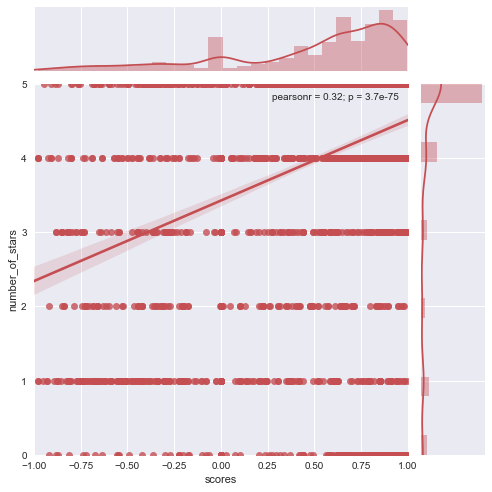

In [9]:
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("scores", "number_of_stars", data=df, kind="reg",
                  xlim=(-1, 1), ylim=(0, 5), color="r", size=7)
g

From this Data Visualization, the relationship between the number of stars and the scores is clearly apparrent. As the number of stars increase, the scores become more positive. The stars of 0, 1, and 2 are generally more solidified towards the negative region of -1. Where as the stars of 3 and higher have much more solid dots and higher bars of positivity values closer to 1.

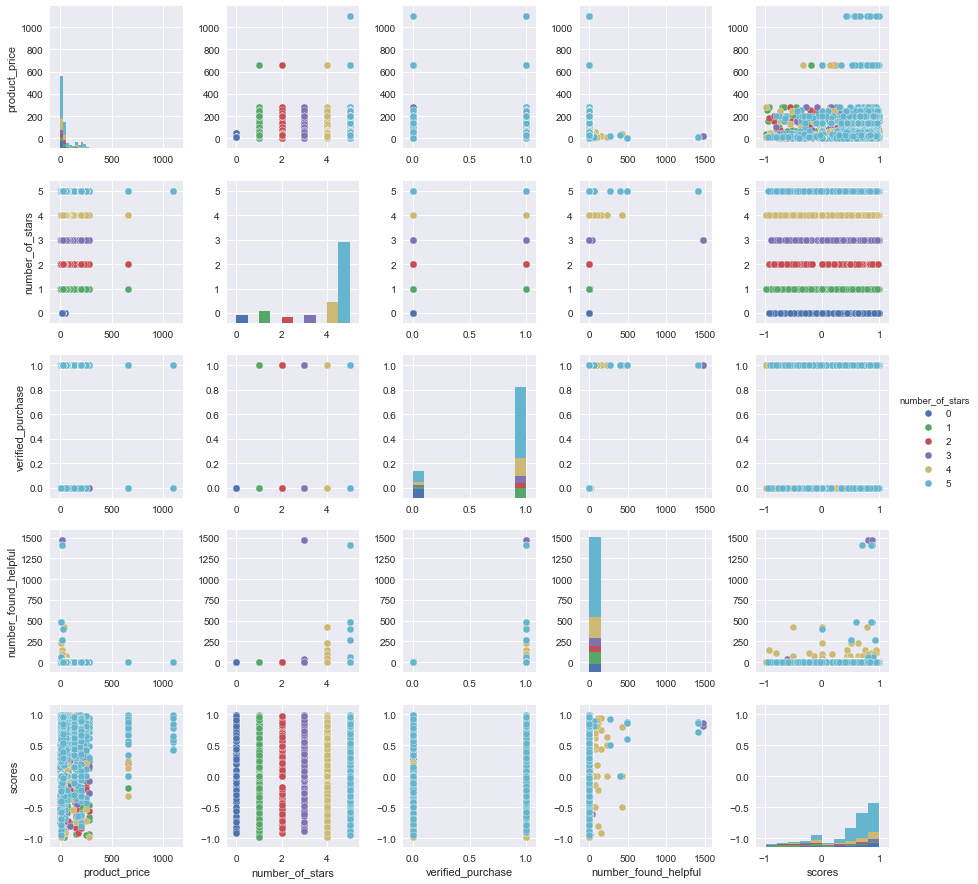

In [11]:
sns.pairplot(data=df, hue='number_of_stars')

For this Particular pairplot there are several interesting visualizations. The one I am focusing on is the graph for number found helpful and the number of stars. 4 from the left and 4 down. It shows that as the number found helpful increases, so does the number of stars. This essentially says that the highest rated products yield the most helpful in terms of understanding the product, or there is some underlying third party variable that biases higher star reviews to be seemingly more helpful.

C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matplotlib\contour.py:1533: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matplotlib\contour.py:1534: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matplotlib\contour.py:1176: RuntimeWarning: invalid value encountered in greater
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matplotlib\contour.py:1176: RuntimeWarning: invalid value encountered in less
  inside = (self.levels > self.zmin) & (self.levels < self.zmax)
C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\Christopher Truong\Anaconda3\lib\site-packages\matpl

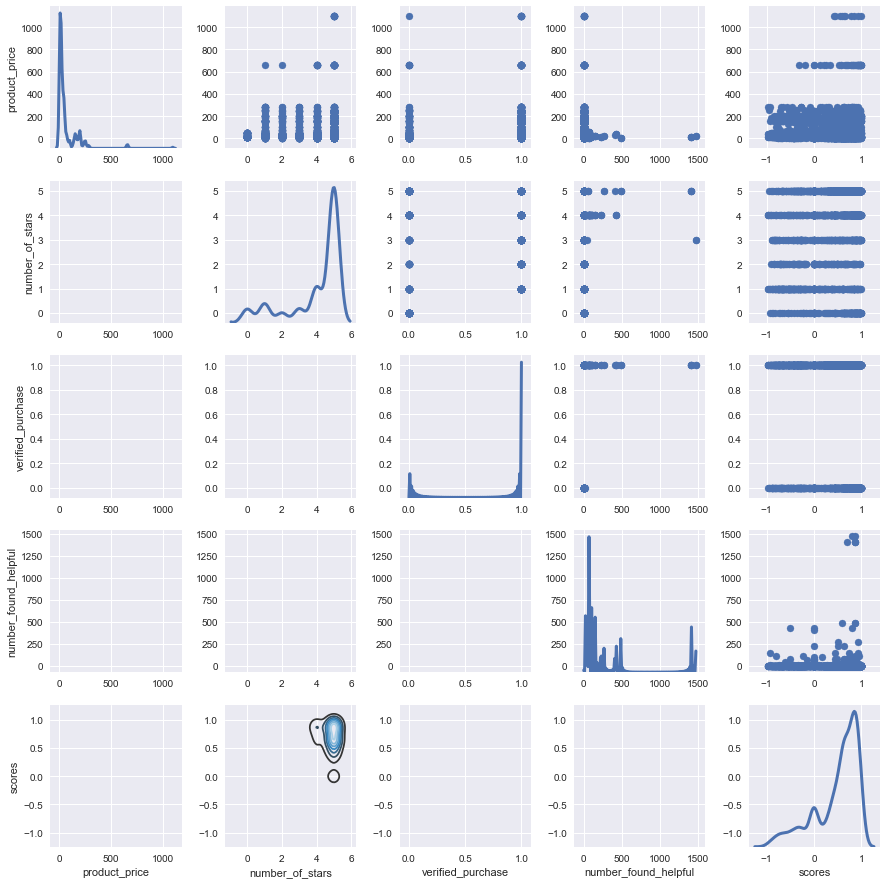

In [12]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In this last visualization, it can be noticed that there are certain factors that do not have a relationship or at least appear not to be related. For the graph of verified purchase and scores (5 from the left and 3 down), there are scores of all ranges  regardless of whether the purchase was verified or not. Therfore, by looking at this graph, it appears that there is no relation between a products sentiment and whether the product was verified. Meaning that verification does not affect the sentiment of the review of satisfication or dissatisfication.